<a href="https://colab.research.google.com/github/ap-sharma/bootcamp2022/blob/main/NeuralTree.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Design Decisions:Set1**

* Algorithm for perceptron training: Pocket Algorithm
* Perceptron algorithm splitting criteria can be: Info Gain or error,first going with error calculation
* stopping criteria:-Maximum Depth,Max no. of leaves,Information Gain. Information Gain is chosen
* EEG features may need to be normalised

#**Some important notes:**
* s(f(x)) = sigmoid(gamma*(f(x)),where hyperparameter gamma steers the steepness of split function during parameter tuning

#Data Fetching and Modification

In [15]:
# implementing Pocket algorithm

# I have used Half moon data set 


#Importing data set
%matplotlib inline
import sklearn.datasets
import matplotlib.pyplot as plt
import matplotlib
import numpy as np
import seaborn as sns
import math

In [16]:
np.random.seed(6) #change it to zero for change in performance

sample size of X: 5000


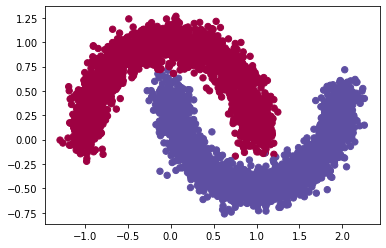

In [17]:
#matplotlib.style.use('ggplot') #makes plots look pretty

# Generate a dataset and plot it
# np.random.seed(0)
X, Y = sklearn.datasets.make_moons(5000, noise=0.1)
# X coordinates
# print('this is x',X)
print("sample size of X:",X.shape[0])
#Y cordinates
# print('This is y',Y)
#desplaying half moon dataset
plt.scatter(X[:,0], X[:,1], s=40, c=Y, cmap=plt.cm.Spectral)

In [18]:
# from sklearn.datasets import make_classification# Generate Clean data
# X,Y = make_classification(n_samples=10000, n_features=6, n_informative=6,n_redundant=0, n_repeated=0, n_classes=2, n_clusters_per_class=3,class_sep=2,flip_y=0,weights=[0.8,0.2], random_state=17)
# # f, (ax1,ax2) = plt.subplots(nrows=1, ncols=1,figsize=(20,8))
# # sns.scatterplot(X[:,0],X[:,1],hue=Y,ax=ax1);
# # ax1.set_title("No Noise");


In [19]:
# plt.figure(figsize=(10,8))
# plt.scatter(X[:,0], X[:,1], s=40, c=Y, cmap=plt.cm.Spectral)

In [20]:
# Adding the X0=1 in the data set 
oneVector = np.ones((X.shape[0], 1))
X_new = np.concatenate((oneVector, X), axis=1)
print(type(X_new))
# print('this is x array:',X_train)
#print('this is class ',Y)

<class 'numpy.ndarray'>


In [21]:
print(X.shape[1])

2


#Train Test Split

#**Design Decisions:Set2**
* Stratified k fold not used for now
* Shuffling of data is done

In [22]:
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test=train_test_split(X_new,Y,test_size=0.3,train_size=0.7, random_state=5, shuffle=True, stratify=None)
print("No. of samples in training data:",X_train.shape[0])
print("No. of samples in test data:",X_test.shape[0])

No. of samples in training data: 3500
No. of samples in test data: 1500


Text(0.5, 1.0, 'Training Data')

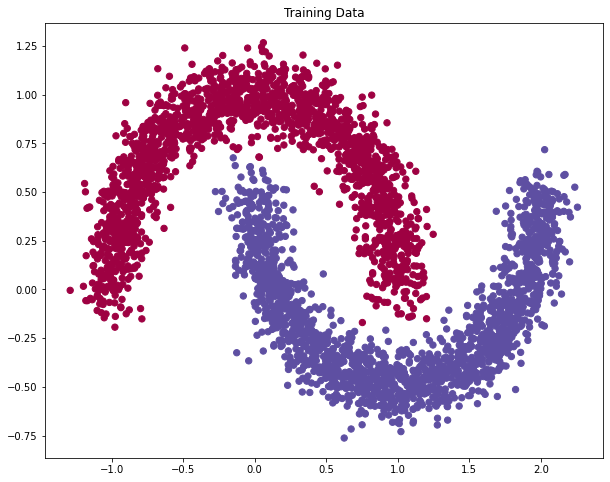

In [23]:
plt.figure(figsize=(10,8))
plt.scatter(X_train[:,1], X_train[:,2], s=40, c=y_train, cmap=plt.cm.Spectral)
plt.title("Training Data")

Text(0.5, 1.0, 'Test Data')

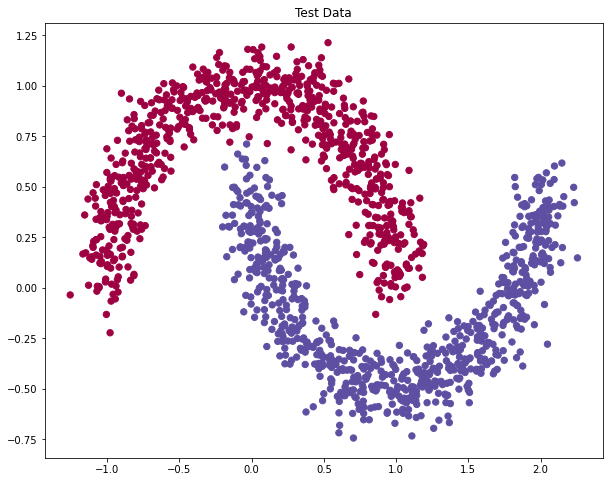

In [24]:
plt.figure(figsize=(10,8))
plt.scatter(X_test[:,1], X_test[:,2], s=40, c=y_test, cmap=plt.cm.Spectral)
plt.title("Test Data")

#Structure Learning

#**Design Decisions:Set3**
* learning rate is set to 0.5
* max iiteration set to 1500
* Information Gain to stop split should be less than 0.002

In [25]:
# Assigning the learning rate and max_itterations
learningRate = 0.05
max_itterations=1500
info_gain_min=0.002

In [26]:
p1=(np.sum(Y==1))/len(Y) #fraction of examples with label 1

In [27]:
#function to calculate entropy
def entropy(p1):
  if (p1==0):
    return(-(1-p1)*math.log2(1-p1))
  elif((1-p1)==0):
    return(-p1*math.log2(p1))
  else:
    return (-p1*math.log2(p1)-(1-p1)*math.log2(1-p1))

In [28]:
class node:
  def __init__(self,index_list):
    self.child_positive=None
    self.child_negative=None
    self.weights=None
    self.index_list=index_list
    self.leaf_node=None
    self.dominant_class=None
    self.entropy=None
    self.p_value=None



In [29]:
root=node(range(0,X_train.shape[0]))
root.entropy=entropy(p1)
root.leaf_node=False
# weights_array=[]

In [30]:
import sys
#Pocket Algorithm
weights_array=[]
index_array=[]
def pocket_algorithm(X_train,Y,learningRate,max_itterations,root): #root is not the root node declared above
# def pocket_algorithm(learningRate,max_itterations,root): #root is not the root node declared above
  plotData = []

  #Assigning random weights 
  weights = np.random.rand(X_train.shape[1], 1)

  misClassifications = 1
  minMisclassifications = X_train.shape[0]
  #Initial iteration starts from
  iteration = 0
  itter_min=0
  index_positive=[]
  index_negative=[]
  

    # Pocket algorithm
  while (misClassifications != 0 and (iteration<max_itterations)):
      iteration += 1
      misClassifications = 0
      false_positives=0
      false_negatives=0

      for i in root.index_list:
          currentX = X_train[i].reshape(-1, X_train.shape[1])
          currentY = Y[i]
          # print(np.dot(currentX, weights)[0][0])
          wTx = np.dot(currentX, weights)[0][0]
          # if wTx < 0:
         
          if currentY == 1 and wTx < 0:
              misClassifications += 1
              false_negatives+= 1
              misclassified_X=currentX
            # weights = weights + learningRate * np.transpose(currentX)
          elif currentY == 0 and wTx > 0:
              misClassifications += 1
              false_positives+= 1
              misclassified_X=currentX
            # weights = weights - learningRate * np.transpose(currentX)
      plotData.append(misClassifications)
      ####After each weight accuracy needs to be recalculated and checked with pocket accuracy
      if misClassifications<minMisclassifications:
          minMisclassifications = misClassifications
          false_negatives_min=false_negatives
          false_positives_min=false_positives
          weights_pocket=weights
          itter_min=iteration+1
      # if iteration%1==0:
      if(misClassifications == 0):print("perfect classfication")
      else:
        # print("Iteration {}, Misclassifications {}".format(iteration, misClassifications))
        if np.dot(misclassified_X, weights)[0][0] < 0:weights = weights + learningRate * np.transpose(misclassified_X)
        elif np.dot(misclassified_X, weights)[0][0] > 0:weights = weights - learningRate * np.transpose(misclassified_X)
        else: print("misclassification error")

          # Checking the accuracy of the algorithm

    # Here Min missclassification is the lowest error points found during linear classification
  for i in root.index_list:
    currentX = X_train[i].reshape(-1, X_train.shape[1])
    if ((np.dot(currentX, weights_pocket)[0][0]) <0 ):
      index_negative.append(i)
    else:
      index_positive.append(i) 

  
  print ("Minimum Misclassifications",minMisclassifications, "at itteration: ",itter_min)
  print ("samples predicted positive:",len(index_positive),"samples predicted negative",len(index_negative))
  print("false positives =",false_positives_min,"false negatives=",false_negatives_min)
  print('Pocket weights are: ',weights_pocket.transpose())
  print ("Accuracy of this split is: ",(((X_train.shape[0]-minMisclassifications)/X_train.shape[0])*100),"%")
  print("Entropy of parent node is:",root.entropy)
  # print("\n")
  #Assigning pocket weights to the root node
  root.weights=weights_pocket              

  #Assigning child nodes their data and calculating Information Gained from split
  if(((len(index_positive))==0) or (len(index_negative)==0)):
    information_gain=0          #this will make this node as leaf node
  else:
    root.child_positive=node(index_positive)
    root.child_positive.entropy=entropy((len(index_positive)-false_positives_min)/(len(index_positive)))
    print("Entropy of positive node:",root.child_positive.entropy)  
    root.child_negative=node(index_negative)
    root.child_negative.entropy=entropy(false_negatives_min/len(index_negative))
    print("Entropy of negative node:",root.child_negative.entropy)  
    weighted_entropy_positive=(len(index_positive)/(len(index_positive)+len(index_negative)))*(root.child_positive.entropy)  
    weighted_entropy_negative=(len(index_negative)/(len(index_positive)+len(index_negative)))*(root.child_negative.entropy)  
    weighted_entropy_split=weighted_entropy_positive+weighted_entropy_negative
    print("weighted entropy of split:",weighted_entropy_split)
    information_gain=(root.entropy-weighted_entropy_split) 
    weights_array.append(weights_pocket)      #if node is not a leaf node then only its weights are appended to weight array 
                                              #leaf nodes are not supposed to have weights associated
                                              #Leaf nodes will have a dominant class  
    index_array.append(root.index_list)       #For keeping track of data on which pocket algo is operated
  
  print("Information Gain in this split is",(information_gain),"\n")
  weights_pocket=list(weights_pocket.transpose()[0])
  
  
  #Deciding whether to go for next split or make the children as leaf node

  if (information_gain >info_gain_min):    
      pocket_algorithm(X_train,y_train,learningRate,max_itterations,root.child_positive)    
      pocket_algorithm(X_train,y_train,learningRate,max_itterations,root.child_negative)
      # pocket_algorithm(learningRate,max_itterations,root.child_positive)    
      # pocket_algorithm(learningRate,max_itterations,root.child_negative)
  else:
    root.leaf_node=True
    if(len(index_positive)>len(index_negative)):
      root.dominant_class=1
    else:
      root.dominant_class=0
    print("Dominant class of this leaf node is:",root.dominant_class,"\n")
  




  # return(weights_array,false_positives_min,false_negatives_min)

In [31]:
# index_list=range(0,X_train.shape[0])
# print(type(index_list),index_list)
# weights_array,false_positives,false_negatives=pocket_algorithm(learningRate,max_itterations,root)
pocket_algorithm(X_train,y_train,learningRate,max_itterations,root)
# pocket_algorithm(learningRate,max_itterations,root)

Minimum Misclassifications 515 at itteration:  408
samples predicted positive: 1406 samples predicted negative 2094
false positives = 84 false negatives= 431
Pocket weights are:  [[-0.18217265  0.26755391 -0.56645103]]
Accuracy of this split is:  85.28571428571429 %
Entropy of parent node is: 1.0
Entropy of positive node: 0.32642767450170734
Entropy of negative node: 0.7334284970912048
weighted entropy of split: 0.5699304523595381
Information Gain in this split is 0.4300695476404619 

Minimum Misclassifications 84 at itteration:  2
samples predicted positive: 1406 samples predicted negative 0
false positives = 84 false negatives= 0
Pocket weights are:  [[0.28069179 0.67224343 0.63642571]]
Accuracy of this split is:  97.6 %
Entropy of parent node is: 0.32642767450170734
Information Gain in this split is 0 

Dominant class of this leaf node is: 1 

Minimum Misclassifications 300 at itteration:  25
samples predicted positive: 385 samples predicted negative 1709
false positives = 127 false

In [32]:
print("No. of nodes assigned weight:",len(weights_array))

No. of nodes assigned weight: 7


In [33]:
#print((weights_array[1][:][0])/5)

print("Weights are:\n",weights_array)
# print("\n\n")
# print(weights_array[0][1])
# print(weights_array[0][2])


Weights are:
 [array([[-0.18217265],
       [ 0.26755391],
       [-0.56645103]]), array([[ 0.05590487],
       [-0.00550984],
       [-0.30115983]]), array([[0.01758527],
       [0.03501772],
       [0.06105136]]), array([[ 0.14490518],
       [-0.22839738],
       [ 0.22014693]]), array([[0.35889641],
       [0.92977225],
       [0.59420281]]), array([[0.39758011],
       [0.75341635],
       [0.8475446 ]]), array([[-0.04375345],
       [ 0.03433049],
       [ 0.00034495]])]


0
1
2
3
4
5
6


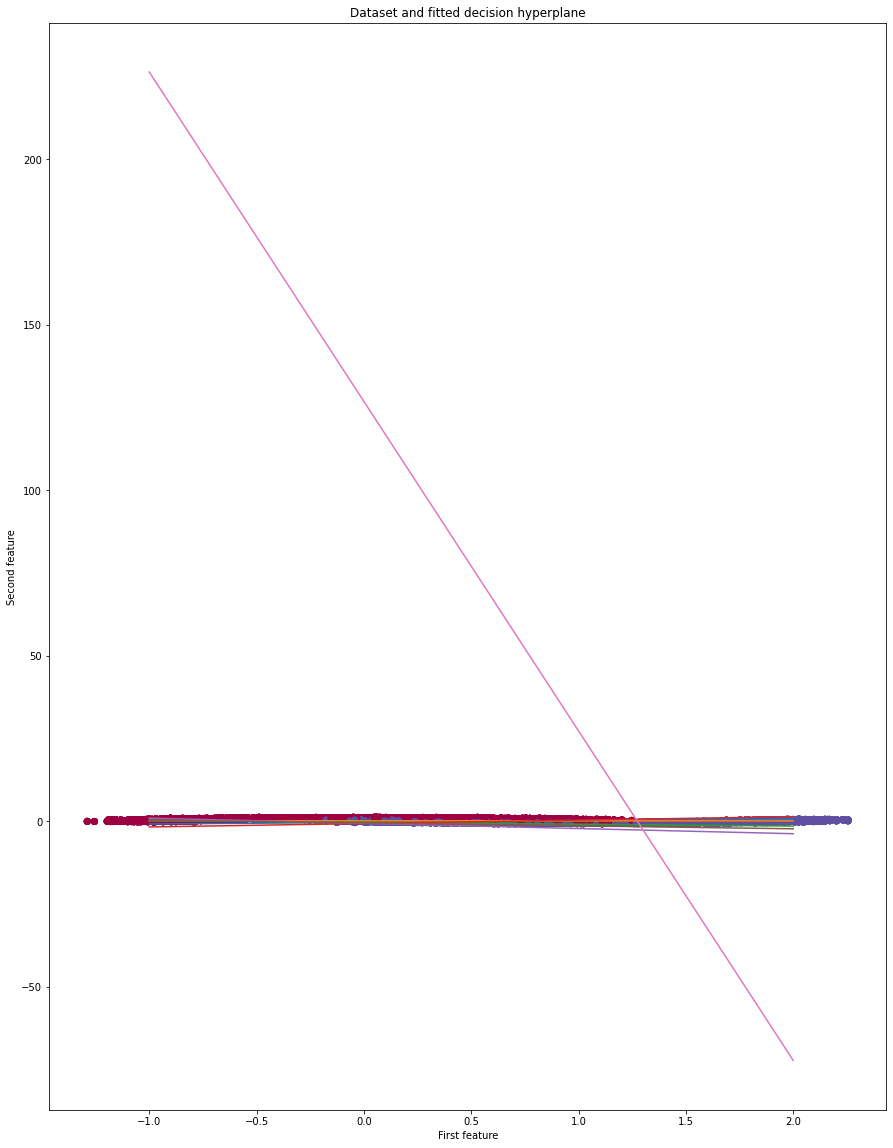

In [34]:
def plot_hyperplane(X, Y, weights_array):
    """
    Plots the dataset and the estimated decision hyperplane
    """
    slope=[]
    y_hyperplane=[]
    intercept=[]
    # print(Y)
    plt.figure(figsize=(15,20))
    for i in range(0,len(weights_array)):
      print(i)
      slope.append(-(weights_array[i][1]/weights_array[i][2]))
      intercept.append(-(weights_array[i][0]/weights_array[i][2]))
      x_hyperplane = np.linspace(-1,2,10)
      y_hyperplane.append(slope[i] * x_hyperplane + intercept[i])
      plt.scatter(X[:,0], X[:,1], c=Y, cmap=plt.cm.Spectral)
      plt.plot(x_hyperplane, y_hyperplane[i], '-')
    plt.title("Dataset and fitted decision hyperplane")
    plt.xlabel("First feature")
    plt.ylabel("Second feature")
    plt.show()
    
    
    
plot_hyperplane(X, Y, weights_array)


In [35]:
# print(X_train)

0


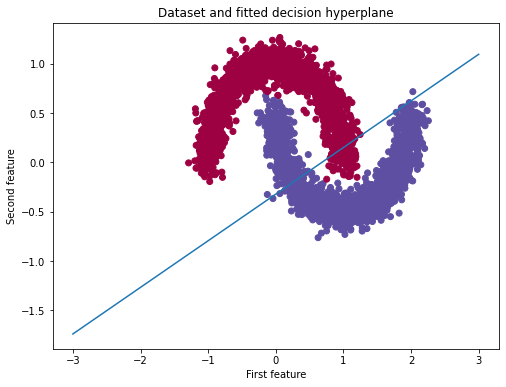

1


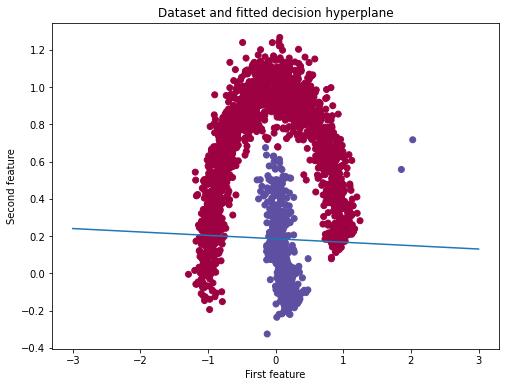

2


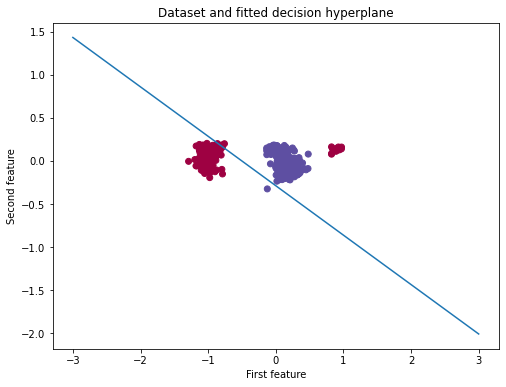

3


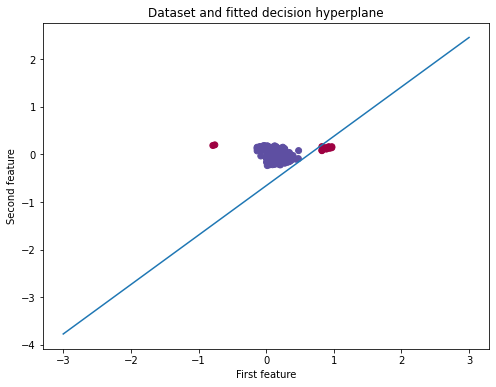

4


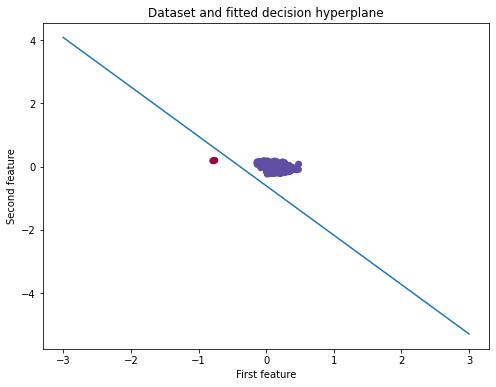

5


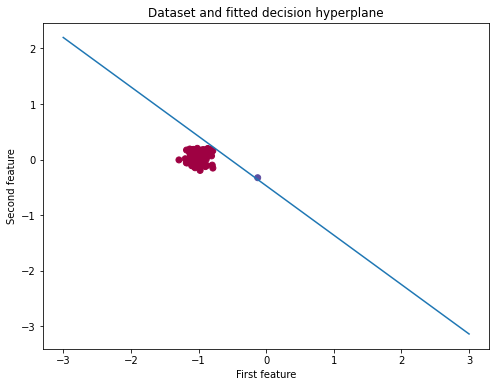

6


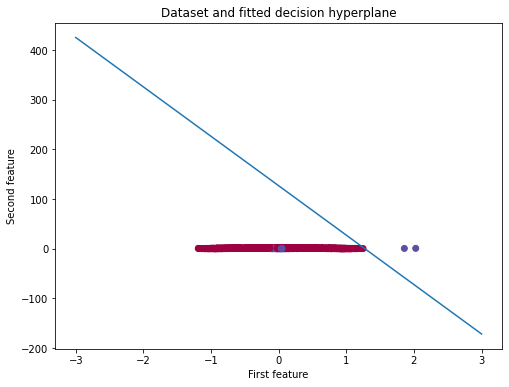

In [36]:
def plot_hyperplane(X,Y, weights_array):
    """
    Plots the dataset and the estimated decision hyperplane
    """
    slope=[]
    y_hyperplane=[]
    intercept=[]
    # print(Y)
    
    for i in range(0,len(weights_array)):
      print(i)
      slope.append(-(weights_array[i][1]/weights_array[i][2]))
      intercept.append(-(weights_array[i][0]/weights_array[i][2]))
      x_hyperplane = np.linspace(-3,3,10)
      y_hyperplane.append(slope[i] * x_hyperplane + intercept[i])
      plt.figure(figsize=(8,6))
      plt.scatter(X[index_array[i],1], X[index_array[i],2], c=Y[index_array[i]], cmap=plt.cm.Spectral)
      plt.plot(x_hyperplane, y_hyperplane[i], '-')
      plt.title("Dataset and fitted decision hyperplane")
      plt.xlabel("First feature")
      plt.ylabel("Second feature")
      plt.show()
    
    
    
plot_hyperplane(X_train,y_train, weights_array)

#Parameter Tuning

In [23]:
#Adam Optmiser

In [2]:
# Use TensorFlow v.2 with this old v.1 code.
# E.g. placeholder variables and sessions have changed in TF2.
import tensorflow.compat.v1 as tf
tf.disable_v2_behavior()

Instructions for updating:
non-resource variables are not supported in the long term


In [25]:
tf.__version__

'2.11.0'

###Tensorflow Graph
A TensorFlow graph consists of the following parts:-

* Placeholder variables used to feed input into the graph.
* Model variables that are going to be optimized so as to make the model perform better.
* The model which is essentially just a mathematical function that calculates some output given the input in the placeholder variables and the model variables.
* A cost measure that can be used to guide the optimization of the variables.
* An optimization method which updates the variables of the model.

In [11]:
x = tf.placeholder(tf.float32, [None, X.shape[1]])
x

<tf.Tensor 'Placeholder_1:0' shape=(?, 2) dtype=float32>

In [12]:
y_true = tf.placeholder(tf.float32, [None,(len(np.unique(Y))-1)])
y_true

<tf.Tensor 'Placeholder_2:0' shape=(?, 1) dtype=float32>

In [70]:
# w=tf.Variable(initial_value=weights_array[0][1:X.shape[1]+1],dtype=tf.float32)
# bias=tf.Variable(initial_value=weights_array[0][0],dtype=tf.float32)
# logits = tf.matmul(x, w) + bias
# feed_dict={x: X[0:10]}
# sigmoid=tf.nn.sigmoid(logits)

# init = tf.global_variables_initializer()
# with tf.Session() as sess:
#   # sess=tf.Session()
#   sess.run(init)
#   your_var1 = sess.run(logits,feed_dict=feed_dict)
#   your_var2 = sess.run(sigmoid,feed_dict=feed_dict)
#   print("your_var_1:\n",your_var1,"\n\n","your_var_2:\n",your_var2)
#   print("\n shape of your_var2 is",your_var2.shape)
#   sess.close()

your_var_1:
 [[-0.60521424]
 [-0.3800916 ]
 [-0.41203055]
 [-0.50792253]
 [-0.7497577 ]
 [ 0.47614068]
 [ 0.43826622]
 [-0.3855413 ]
 [ 0.27760732]
 [-0.917171  ]] 

 your_var_2:
 [[0.35315168]
 [0.40610477]
 [0.39842534]
 [0.37568066]
 [0.3208741 ]
 [0.61683613]
 [0.60784584]
 [0.40479112]
 [0.56895953]
 [0.28553465]]

 shape of your_var2 is (10, 1)


In [41]:
weights_array[0]

array([[-0.18217265],
       [ 0.26755391],
       [-0.56645103]])

In [52]:
loss_function=0

###Calculating loss function

In [53]:
def in_order_traversal(node):
  if(node.leaf_node==True):
    loss_function+=node.p_value
    return
  
  w=tf.Variable(initial_value=node.weights[1:X.shape[1]+1],dtype=tf.float32)
  bias=tf.Variable(initial_value=node.weights[0],dtype=tf.float32)
  logits = tf.matmul(x, w) + bias
  node.child_positive.p_value=tf.nn.sigmoid(logits)
  in_order_traversal(node.child_positive)

  node.child_negative.p_value= 1 - tf.nn.sigmoid(logits)
  in_order_traversal(node.child_negative)
print(loss_function)


In [ ]:
###Describe a tree here

In [40]:
# logits = tf.matmul(x, w)

#Validation

In [ ]:
FP=0
FN=0
TP=0
TN=0
def testing(test_sample,node,y):
  global FN
  global FP
  global TN
  global TP
  # print("TN:",TN)

  if (node.leaf_node != True):
    test_x = test_sample.reshape(-1, X_test.shape[1])
    print("weights of this node are:",node.weights)
    if ((np.dot(test_x, node.weights)[0][0]) >0 ):
      testing(test_sample,node.child_positive,y)
    if ((np.dot(test_x, node.weights)[0][0]) <0 ):
      testing(test_sample,node.child_negative,y)
  else:
    # print("Predicted label of X is:",node.dominant_class," and actual label is:",y )
    if (y==0 and node.dominant_class==1):
      print("False Negative")
      FN+=1
    elif(y==1 and node.dominant_class==0):
      print("False Positive")
      FP+=1
    else:
      if(y):
        TP+=1
        print("True Positive")
      else:
        TN+=1
        print("True Negative")
      # print("Correct Classification")

In [ ]:
for i in (range(0,X_test.shape[0])):
  testing(X_test[i],root,y_test[i])

In [ ]:
sensitivity=TP/(TP+FN)
specificity=TN/(TN+FP)
print("Sensitivity:",sensitivity,"Specificity:",specificity)

#Testing

In [ ]:
def inference(test_sample,node):
  if (node.leaf_node != True):
    test_x = test_sample.reshape(-1, X_train.shape[1])
    print("weights of this node are:",node.weights)
    if ((np.dot(test_x, node.weights)[0][0]) >0 ):
      inference(test_sample,node.child_positive)
    if ((np.dot(test_x, node.weights)[0][0]) <0 ):
      inference(test_sample,node.child_negative)
  else:
    print("Predicted label of X is:",node.dominant_class)
    

In [ ]:
inference(X_test[6],root)

In [ ]:
inference(X_test[20],root)

##Results of test on structure learned without parameter tuning

In [ ]:
# This model usually creates a longer traversal for any one label and much shorter traversal for another
#Nature of data is important,if both classes are intermingled too much performance gets a small hit.
#Performance is improved with more features
#As of now all nodes weight are independently calculated
#size of tree is large for more no of features